# Random Forest - Classification

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\01 - Introduction to Course\\1UNZIP-FOR-NOTEBOOKS-FINAL\\DATA\\penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Here we are droping all null values
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Train | Test Split

In [4]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [5]:
y=df['species']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

# Random Forest Classification

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
#help(RandomForestClassifier)

In [10]:
rfc = RandomForestClassifier(n_estimators=10,
                             max_features='auto',
                             random_state=101)

In [11]:
rfc.fit(X_train,y_train)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=101)

In [12]:
preds = rfc.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
from mlxtend.plotting import plot_confusion_matrix

In [15]:
d=confusion_matrix(y_test,preds)
d

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

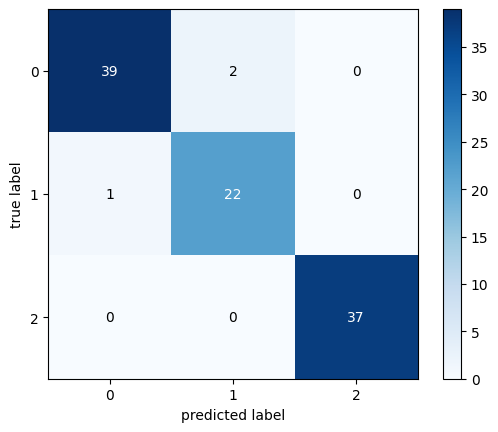

In [16]:
plot_confusion_matrix(d,colorbar=True);

In [17]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



## Feature Importance

Very useful attribute of the trained model!

In [18]:
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [19]:
# creating a DataFrame so that we can see the importance of each feature
pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.318677
culmen_depth_mm,0.101849
flipper_length_mm,0.173434
body_mass_g,0.213170
island_Dream,0.145121
island_Torgersen,0.037201
sex_FEMALE,0.006323
sex_MALE,0.004226


## Choosing correct number of trees

Let's explore if continually adding more trees improves performance...

In [20]:
test_error = []
from sklearn.metrics import accuracy_score

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` o

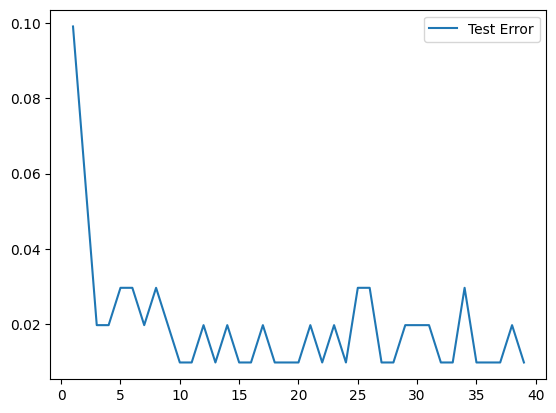

In [21]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend();

Clearly there are diminishing returns, on such a small dataset, we've pretty much extracted all the information we can after about 5 trees

# Random Forest - HyperParameter Exploration

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

## Data

In [22]:
df=pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\01 - Introduction to Course\\1UNZIP-FOR-NOTEBOOKS-FINAL\\DATA\\data_banknote_authentication.csv")
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


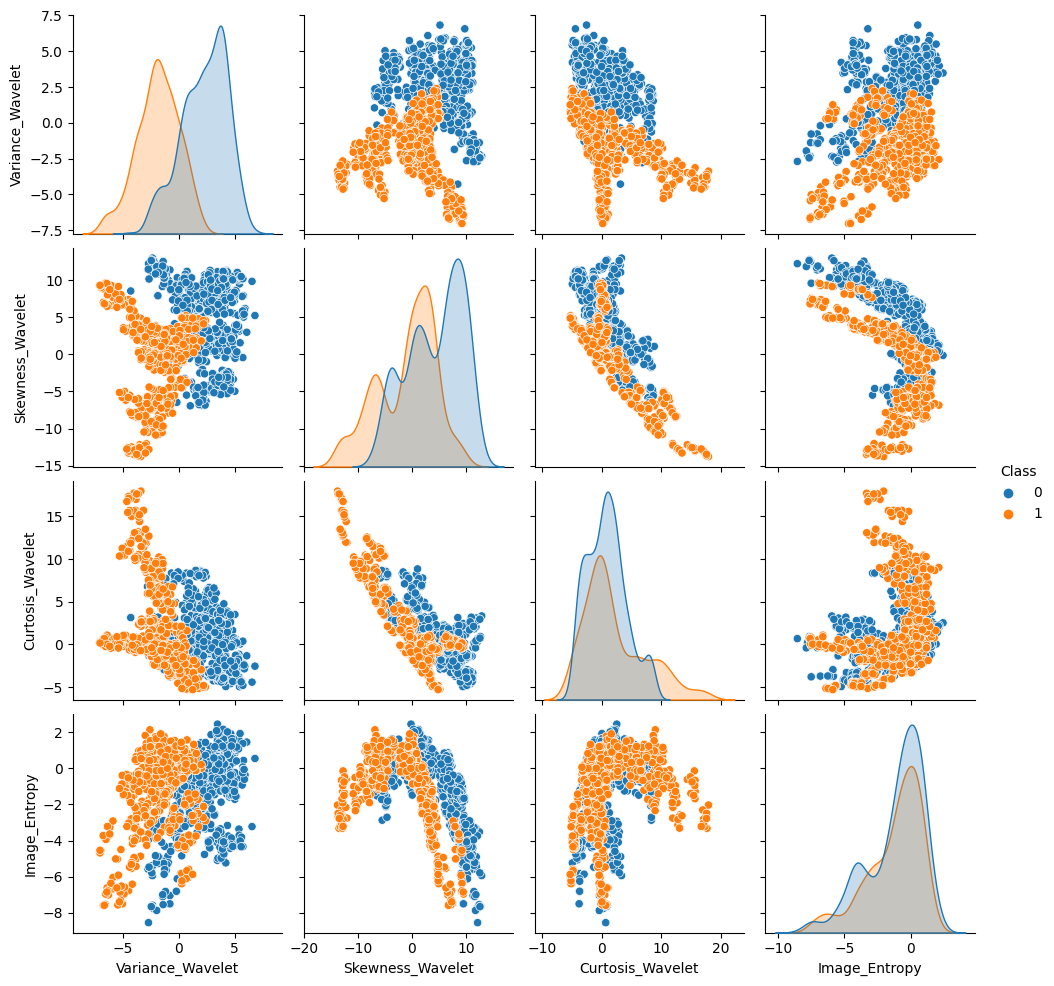

In [23]:
sns.pairplot(df,hue='Class')

In [24]:
X= df.drop('Class',axis=1)
y=df['Class']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.15,random_state=101)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid={'n_estimators':[64,100,128,200],
           'max_features':[2,3,4],
           'bootstrap':[True,False],
           'oob_score':[True,False]} 
# Note, oob_score only makes sense when bootstrap=True!

In [29]:
rfc = RandomForestClassifier()

In [30]:
grid = GridSearchCV(rfc,param_grid)

In [31]:
grid.fit(X_train,y_train)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  wa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [32]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [33]:
predis = grid.predict(X_test)

In [34]:
print(classification_report(y_test,predis))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [35]:
p=confusion_matrix(y_test,predis)
p

array([[122,   2],
       [  0,  82]], dtype=int64)

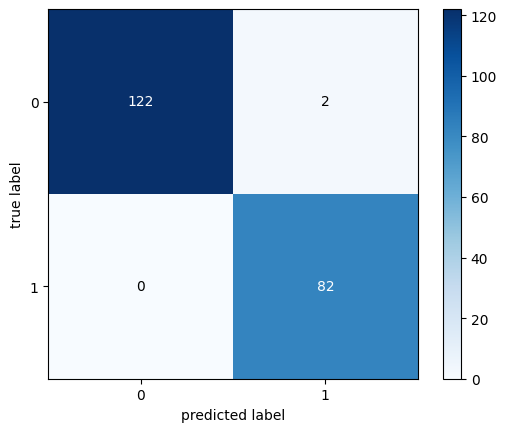

In [36]:
plot_confusion_matrix(p,colorbar=True);

In [37]:
# No underscore, reports back original oob_score parameter
grid.best_estimator_.oob_score
# If it true then it would generate value

True

In [44]:
# With underscore, reports back fitted attribute of oob_score
grid.best_estimator_.oob_score_
# That value is only generate when .oob_score is True , show error if its False

0.9965694682675815

## Understanding Number of Estimators (Trees)

Let's plot out error vs. Number of Estimators

In [39]:
from sklearn.metrics import accuracy_score

In [45]:
error = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier(n_estimators=n,bootstrap=True,max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1- accuracy_score(y_test,preds)
    n_missed=np.sum(preds != y_test)# watch the video to understand this line!!
    error.append(err)
    misclassifications.append(n_missed)

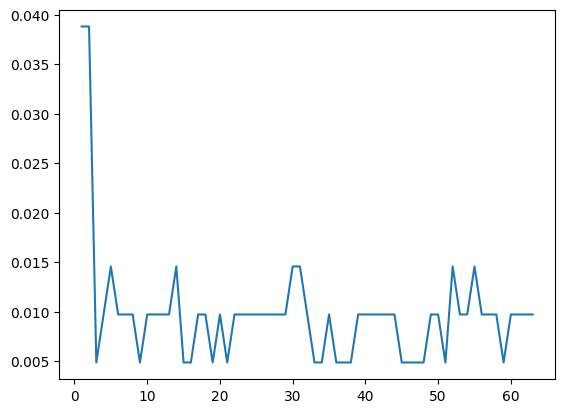

In [46]:
plt.plot(range(1,64),error)

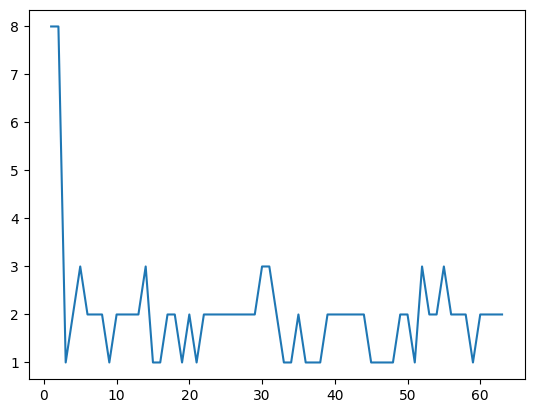

In [47]:
plt.plot(range(1,64),misclassifications);

# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [49]:
df = pd.read_csv("D:\\Study\\Programming\\python\\Python course from udemy\\Udemy - 2022 Python for Machine Learning & Data Science Masterclass\\01 - Introduction to Course\\1UNZIP-FOR-NOTEBOOKS-FINAL\\DATA\\rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [50]:
df.columns=['Signal','Density']

In [51]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


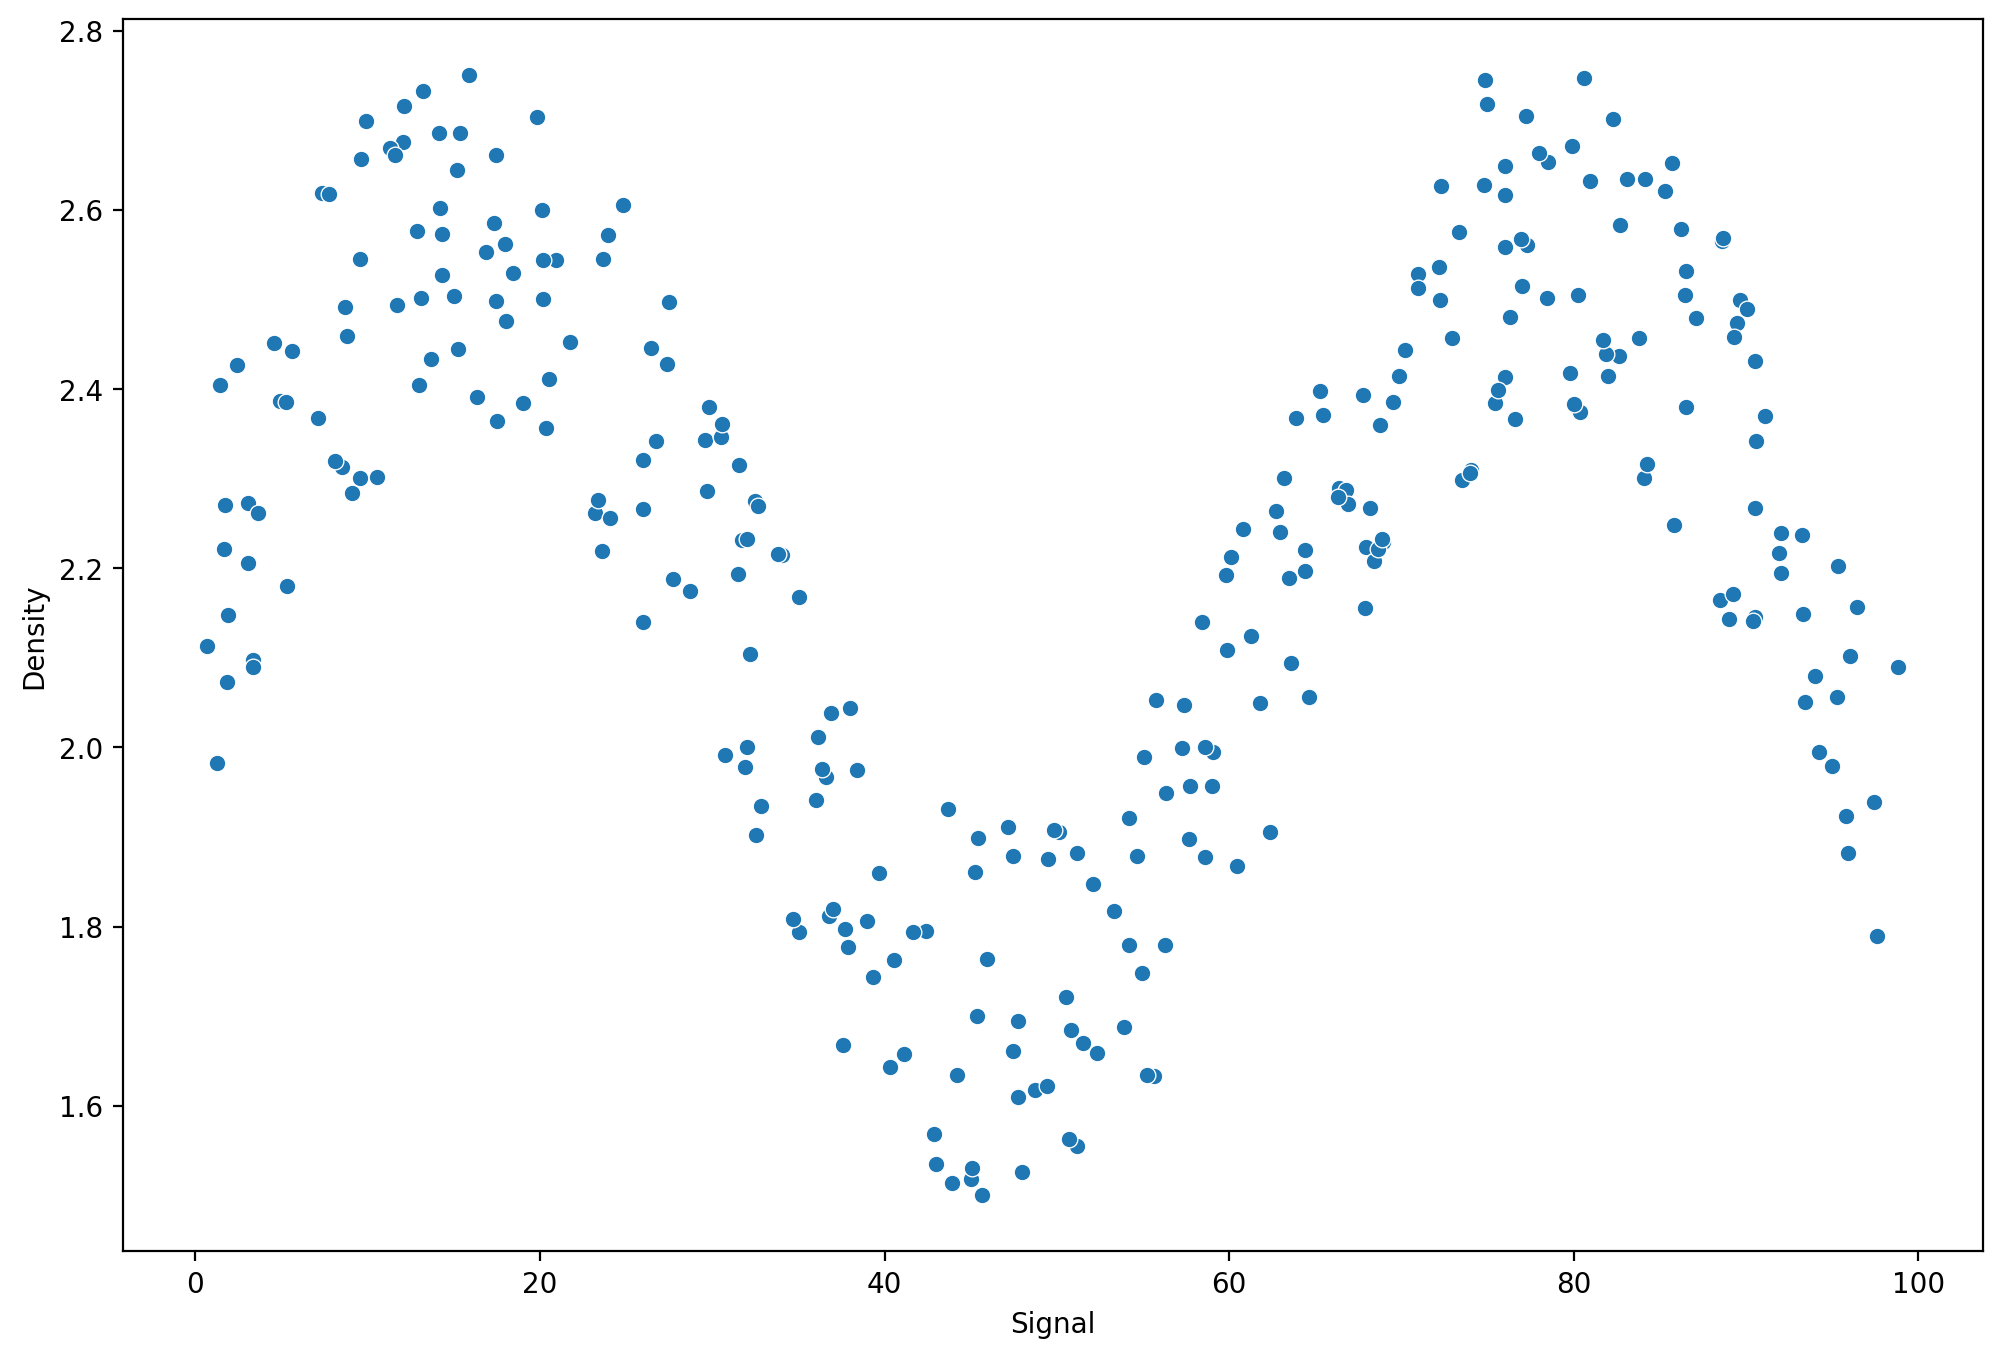

In [56]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df);

---
---

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [98]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density'] 

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

-----

# Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr_model = LinearRegression()

In [72]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [73]:
lr_pred = lr_model.predict(X_test)

In [89]:
# All number are close to 2.22
lr_pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [91]:
mean_absolute_error(y_test,lr_pred)

0.211198973318633

In [75]:
np.sqrt(mean_squared_error(y_test,lr_pred))

0.2570051996584629

What does the fit look like?

In [80]:
signal_range = np.arange(0,100)

In [82]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

In [92]:
lr_output

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

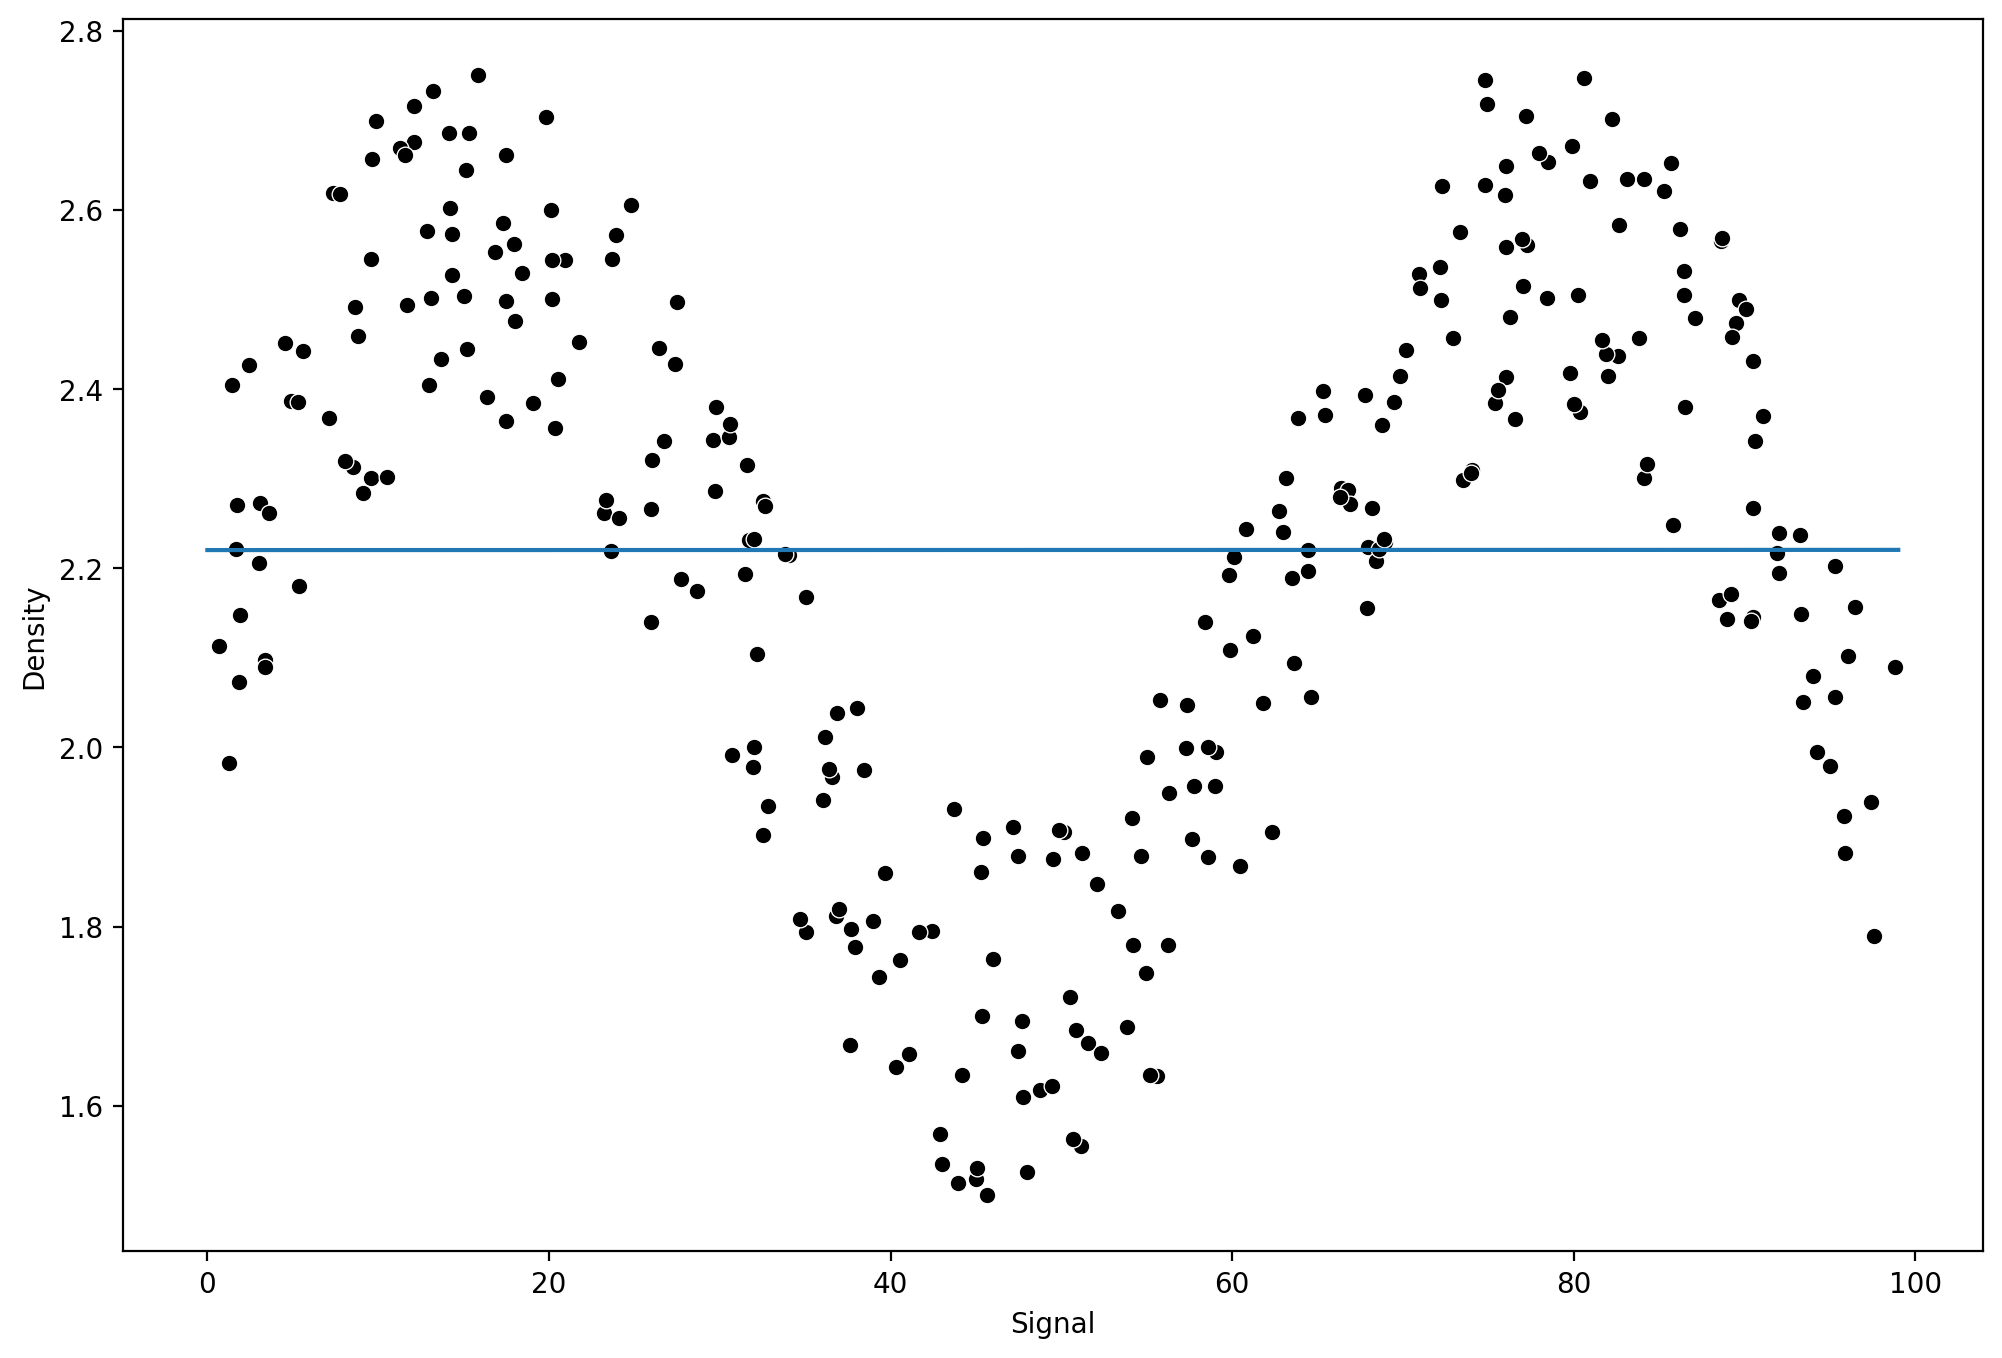

In [84]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output);

---

# Polynomial Regression

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

## Function to Help Run Models

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [101]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f"MAE : {mae}")
    print(f"RMSE: {rmse}")
    
    #Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)
    

MAE : 0.211198973318633
RMSE: 0.2570051996584629


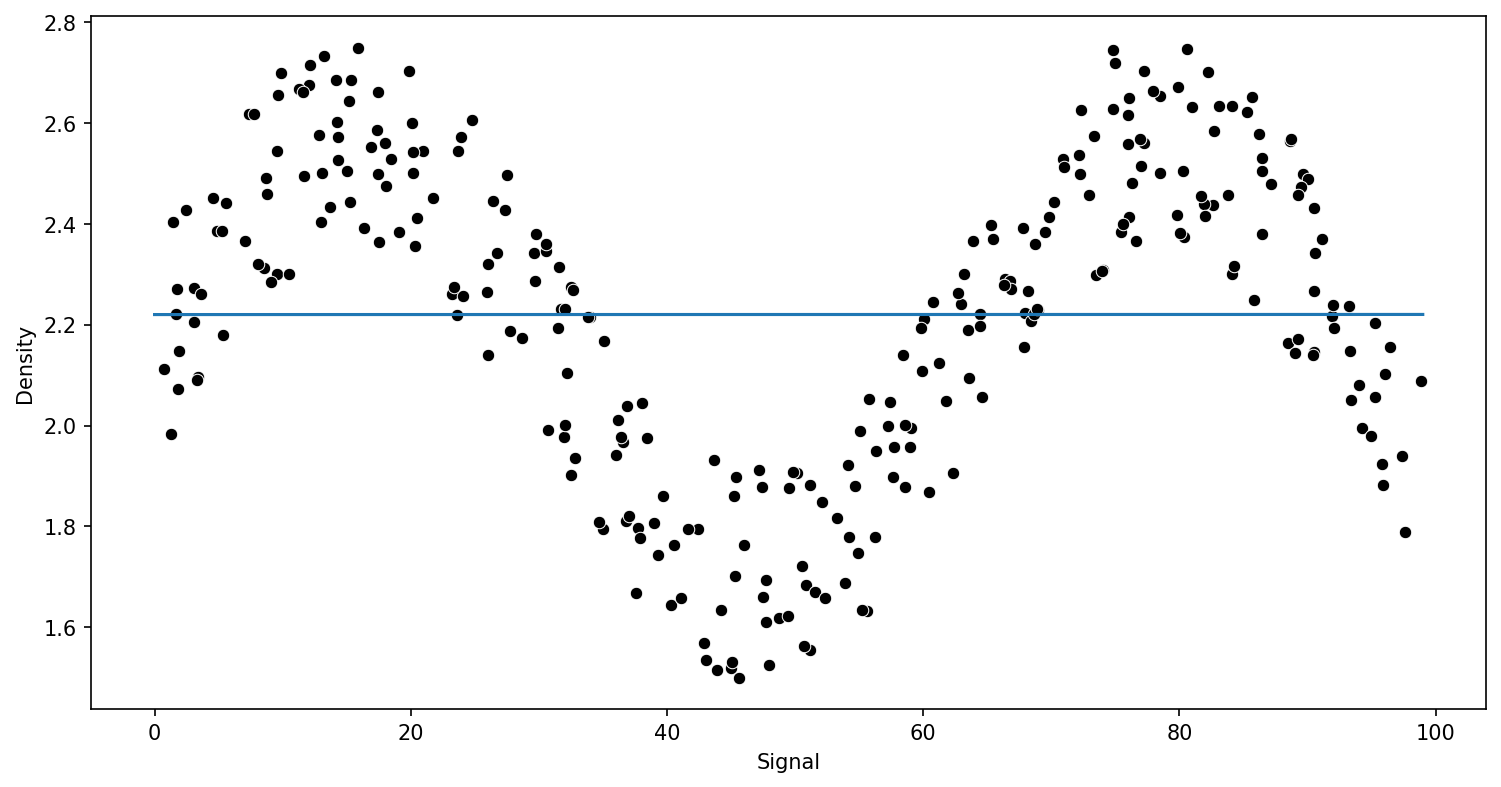

In [102]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [103]:
from sklearn.pipeline import make_pipeline

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

MAE : 0.22903105443511335
RMSE: 0.2817309563725596


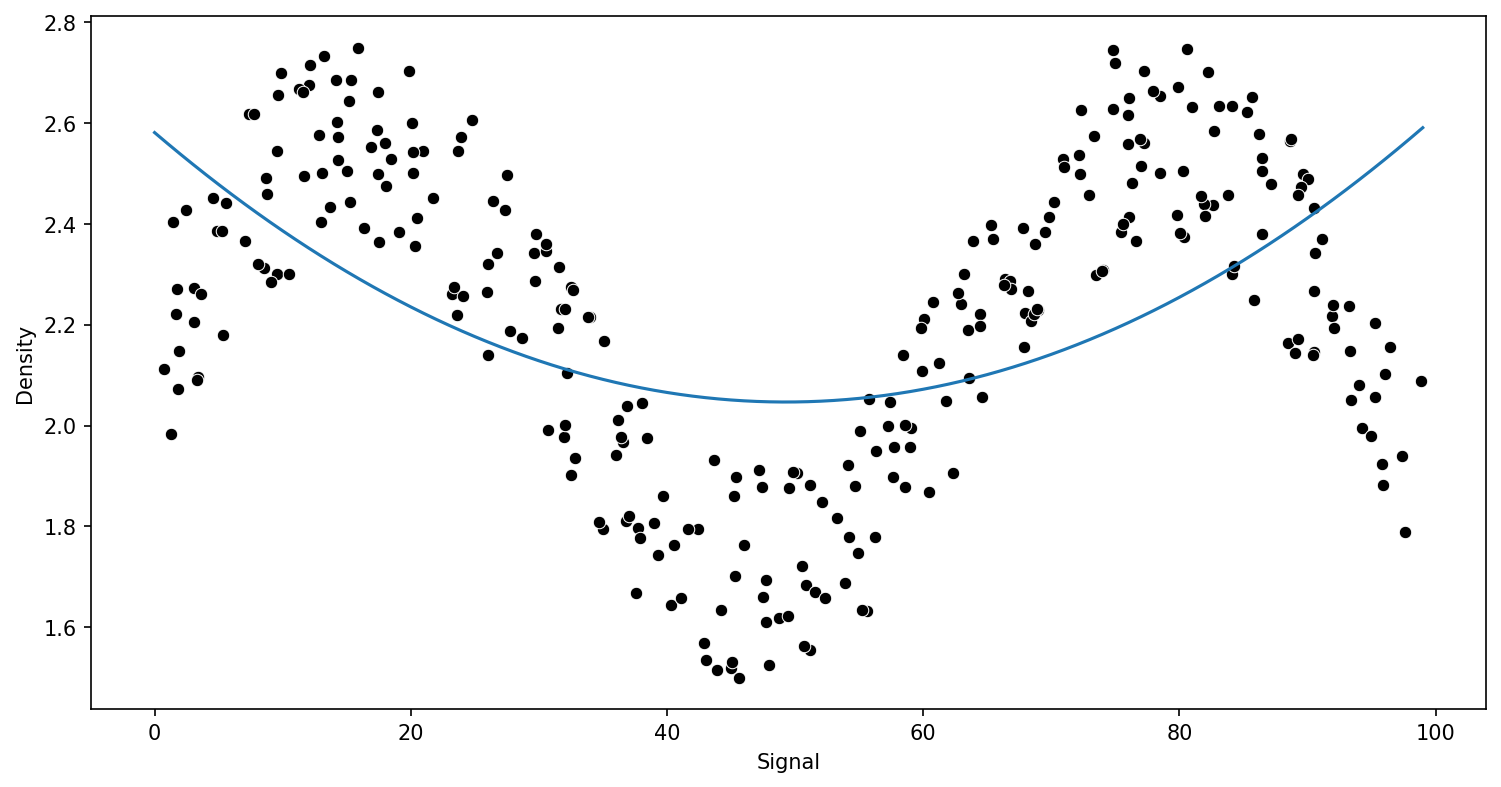

In [106]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

MAE : 0.12478026429426053
RMSE: 0.14049911421019984


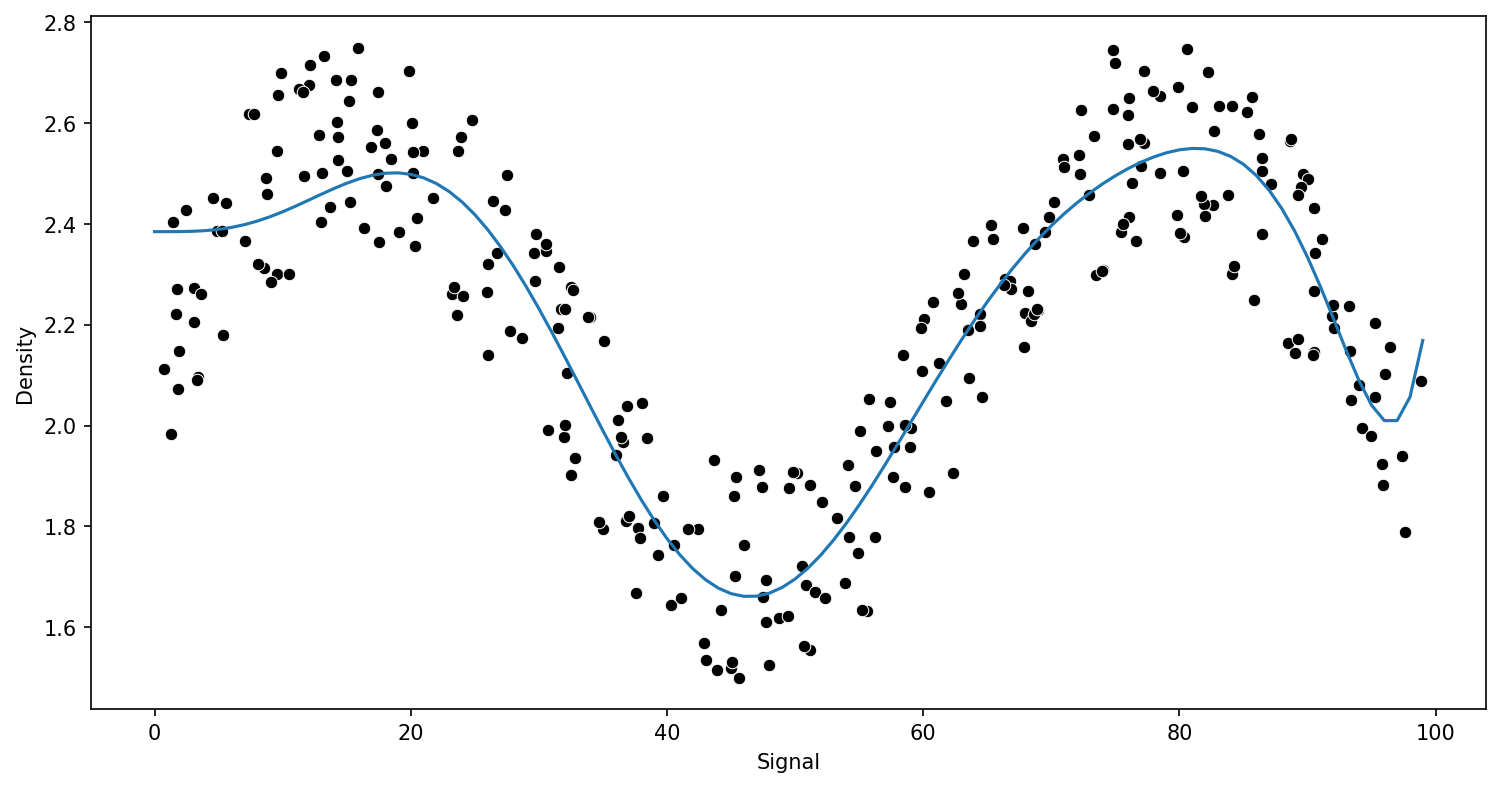

In [107]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

In [108]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442378
RMSE: 0.1523487028635337
MAE : 0.12198383614100558
RMSE: 0.13730685016923647
MAE : 0.11635971693292672
RMSE: 0.13277855732740926


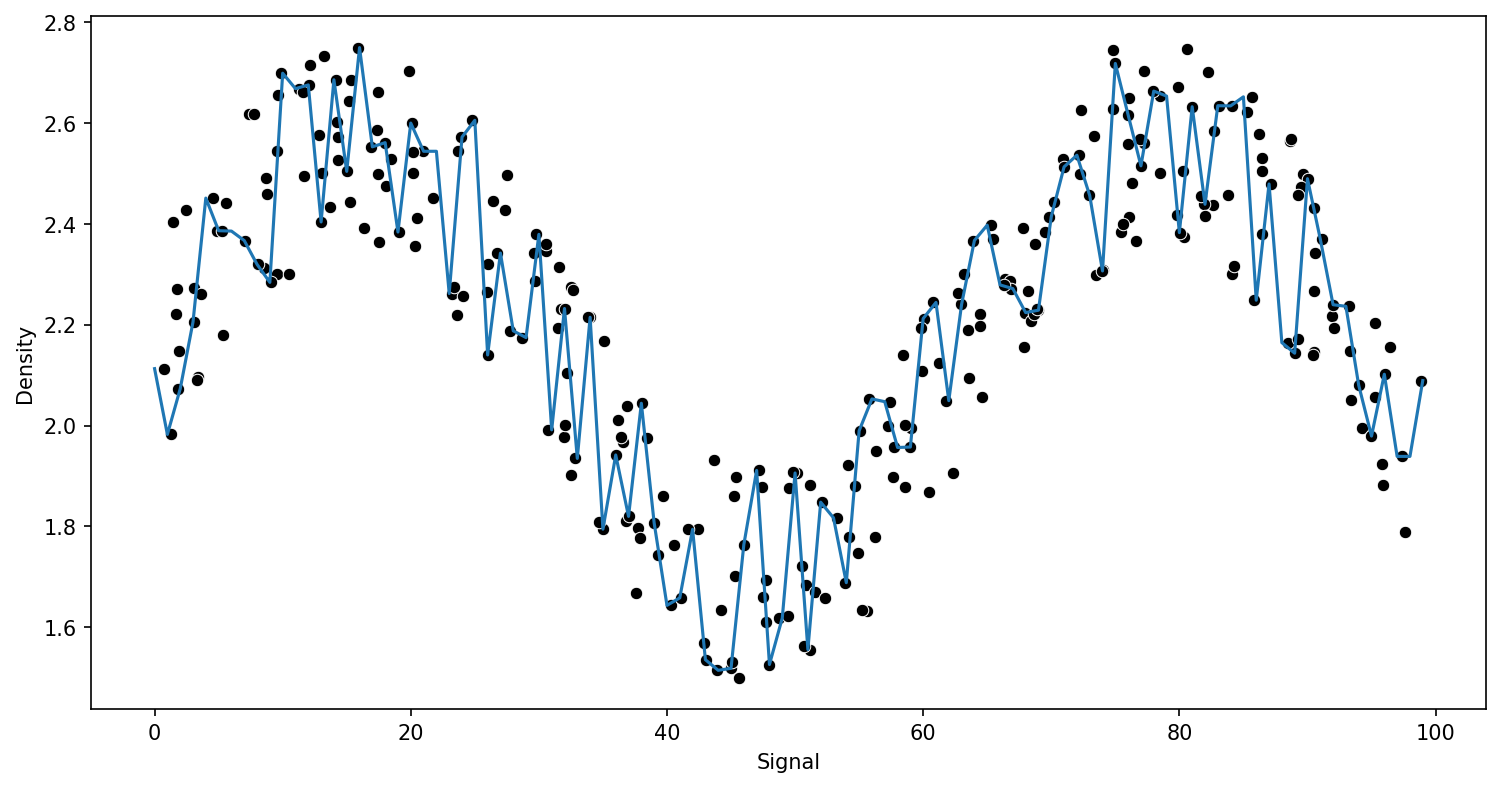

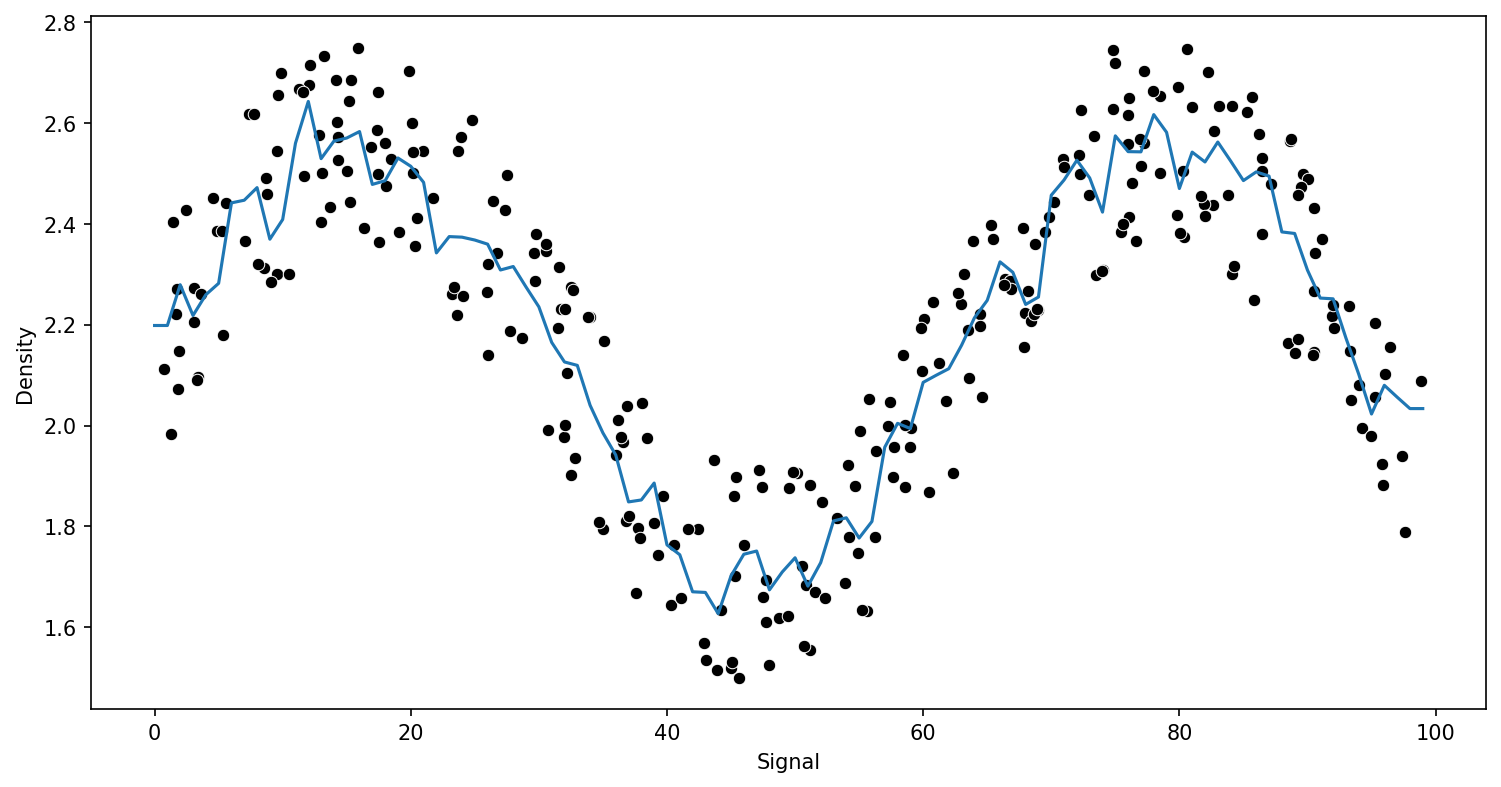

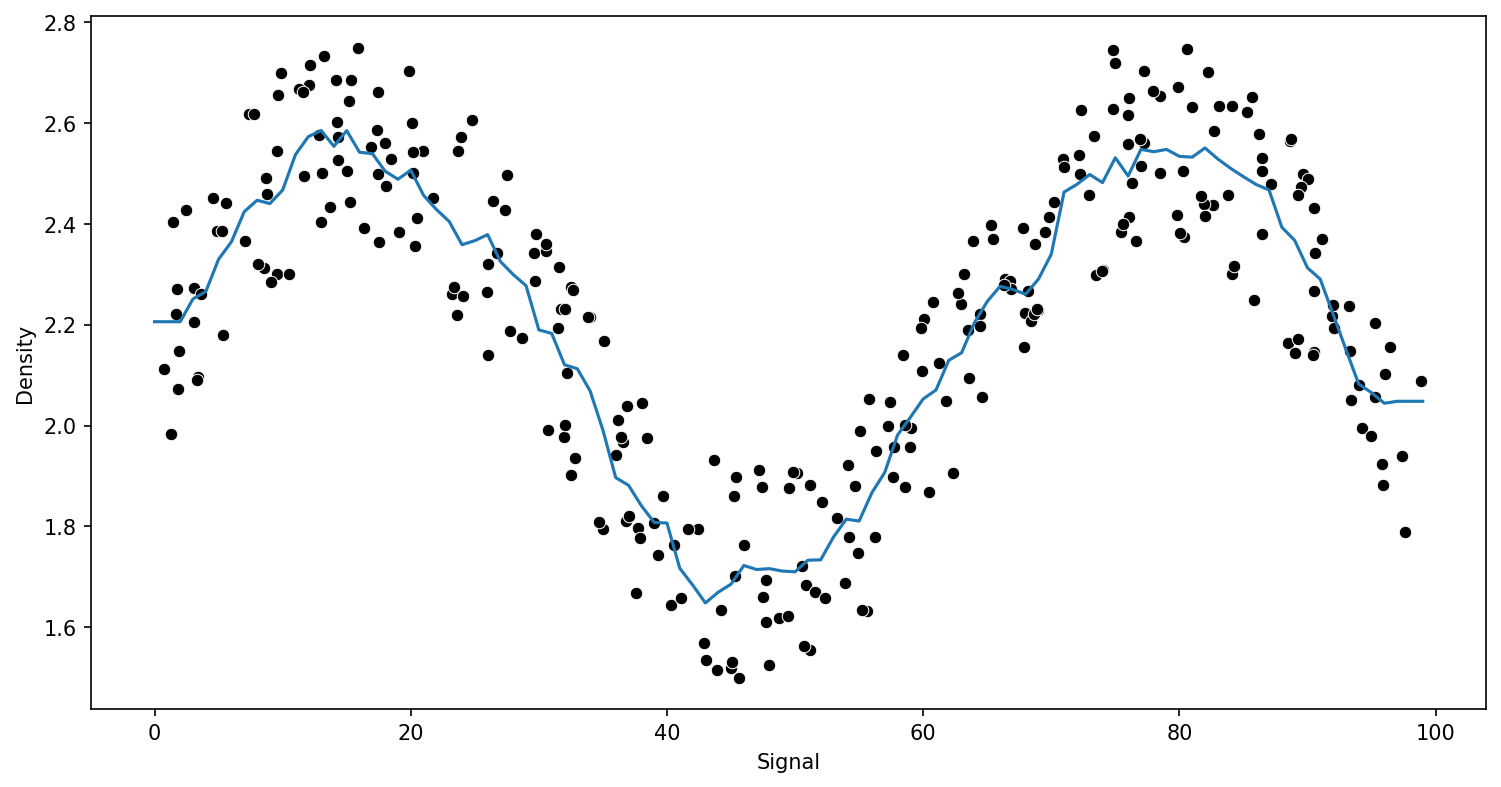

In [109]:
preds ={}
k_values = [1,5,10]
for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [110]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442378
RMSE: 0.1523487028635337


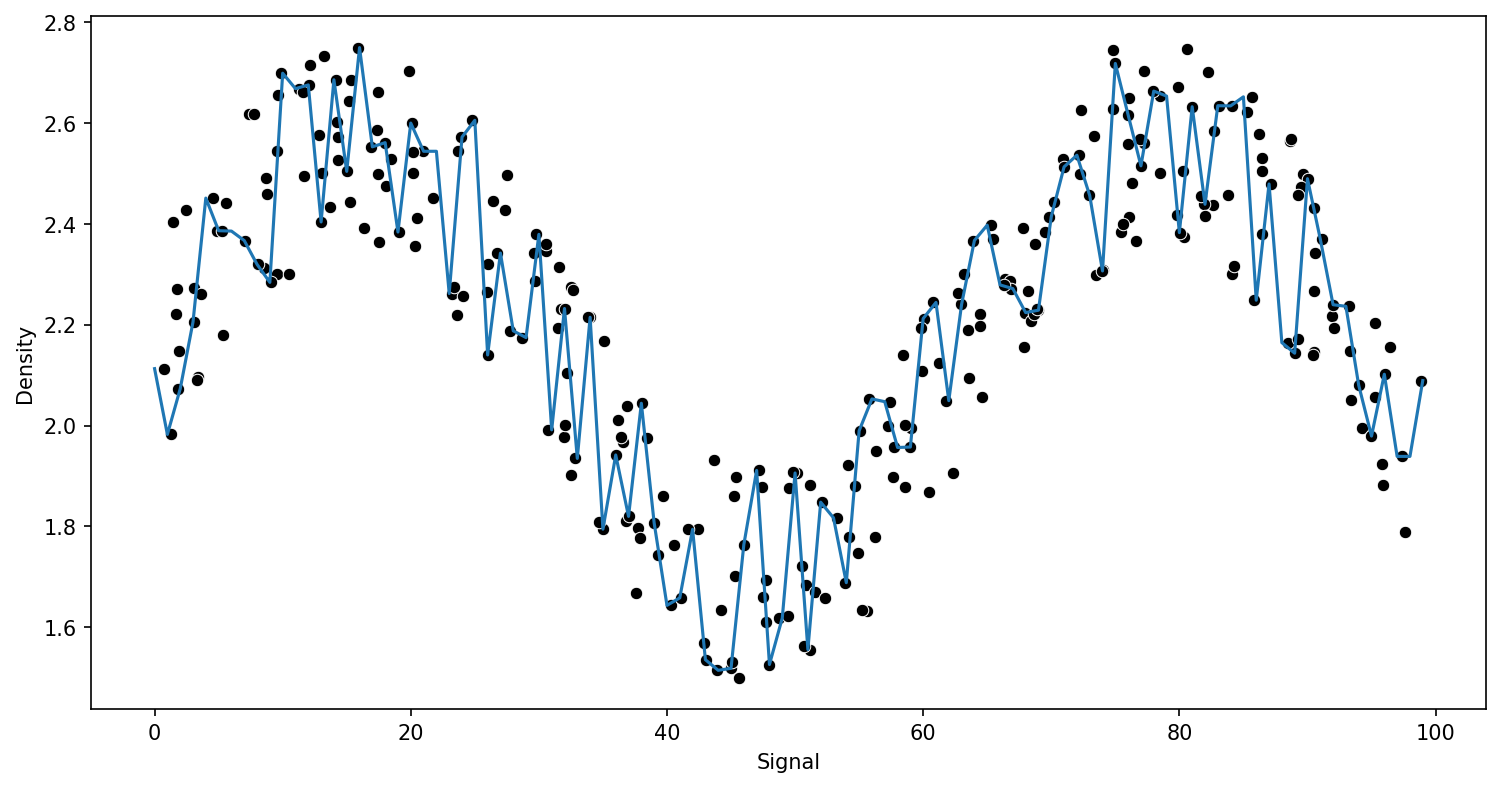

In [111]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [112]:
model.get_n_leaves()

270

----

## Support Vector Regression

In [113]:
from sklearn.svm import SVR

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {'C':[0,0.01,.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [116]:
grid = GridSearchCV(svr,param_grid)

C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\Chromsy\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 581, in _validate_params
    validate

MAE : 0.10854210121348368
RMSE: 0.12646999302046696


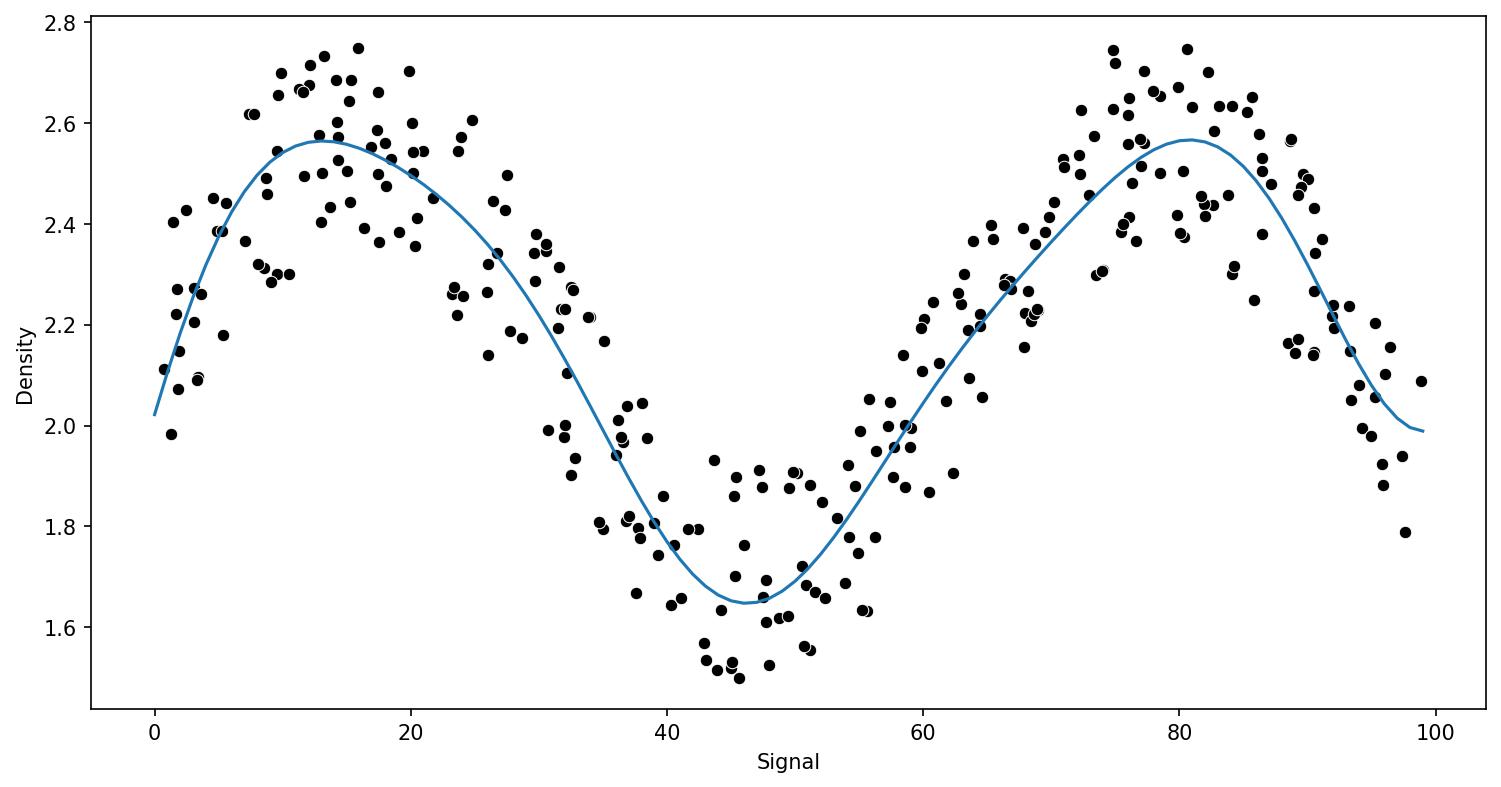

In [117]:
run_model(grid,X_train,y_train,X_test,y_test)

In [118]:
grid.best_estimator_

SVR(C=1000)

---

## Random Forest Regression

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
# help(RandomForestRegressor)

MAE : 0.10794614401455976
RMSE: 0.12923933126466158
MAE : 0.11190211837017762
RMSE: 0.13637615617898904
MAE : 0.10990104288555731
RMSE: 0.13096990474747555


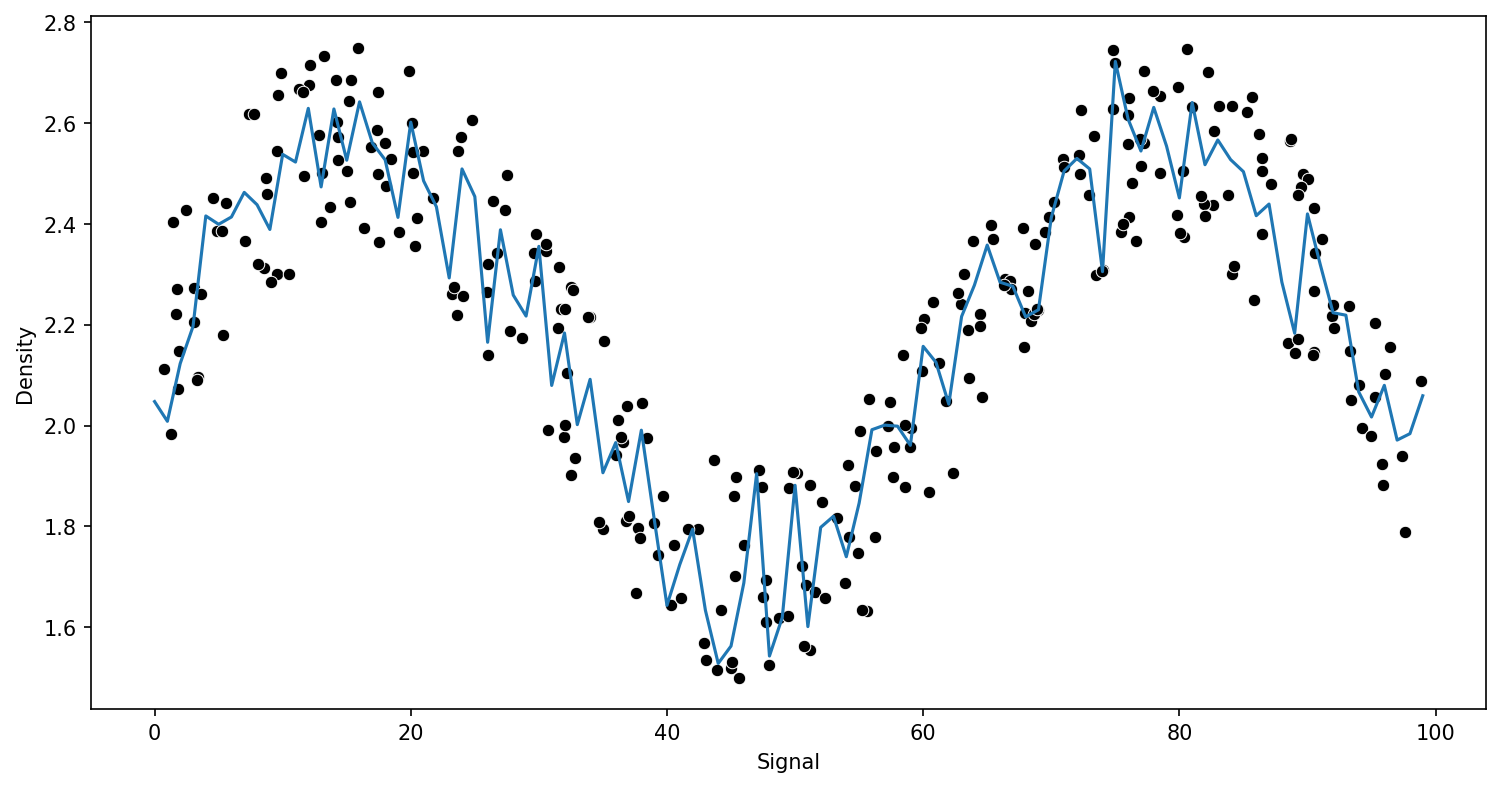

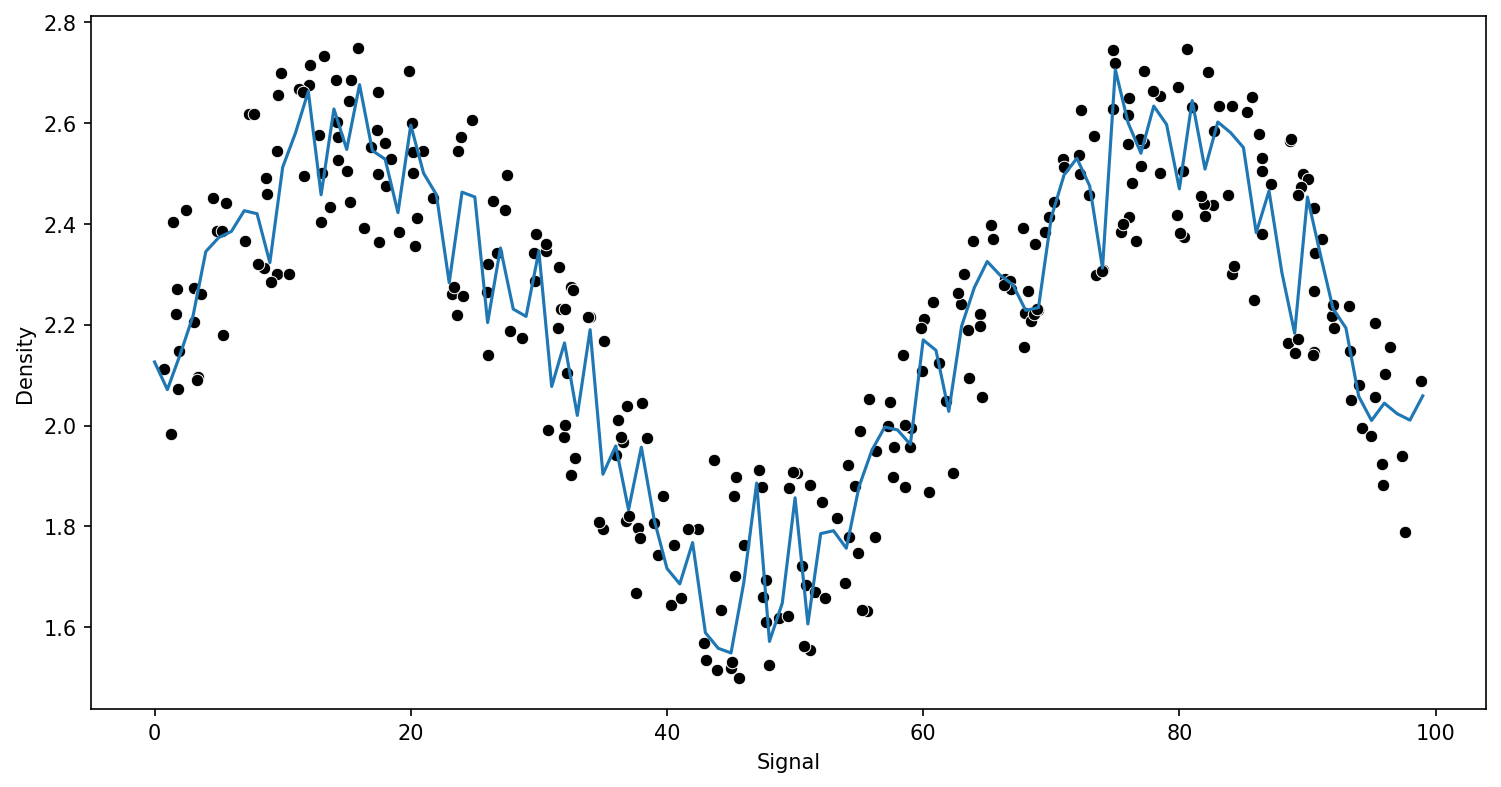

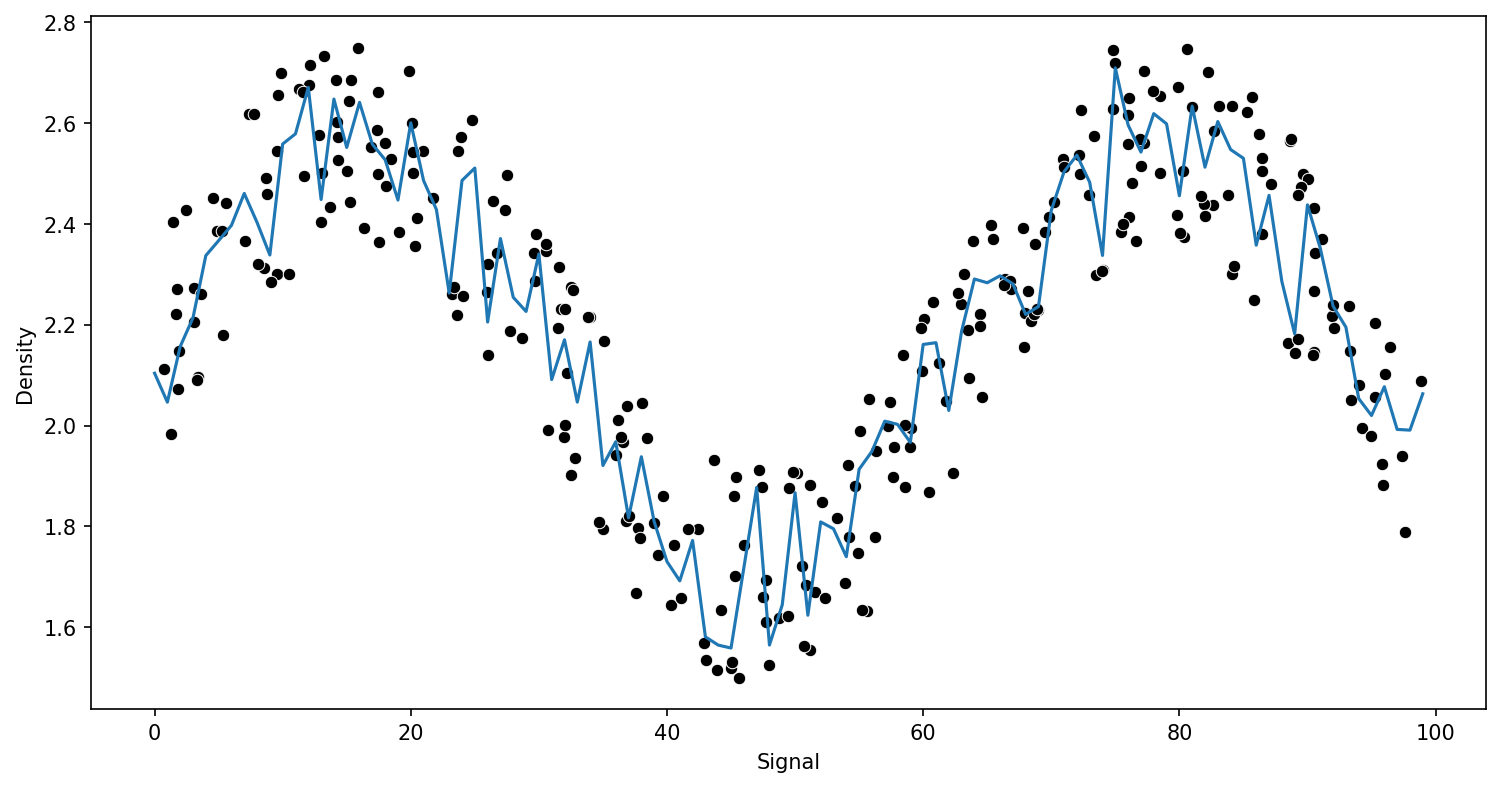

In [121]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

We will cover this in more detail in next section.

In [122]:
from sklearn.ensemble import GradientBoostingRegressor

In [123]:
# help(GradientBoostingRegressor)

MAE : 0.11318284854800689
RMSE: 0.13294148649584667


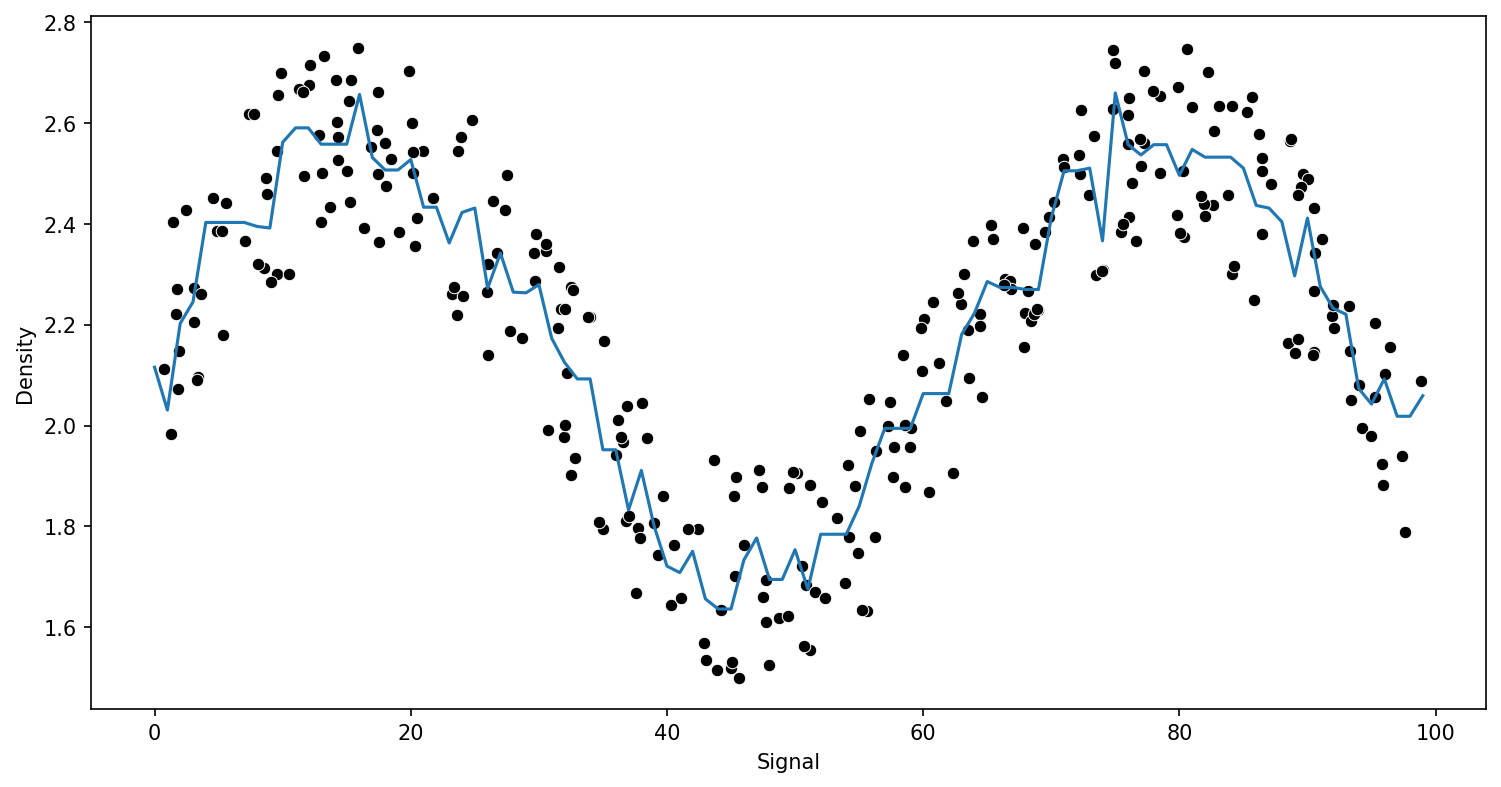

In [124]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [127]:
from sklearn.ensemble import AdaBoostRegressor

MAE : 0.11711438520863086
RMSE: 0.13457543971524755


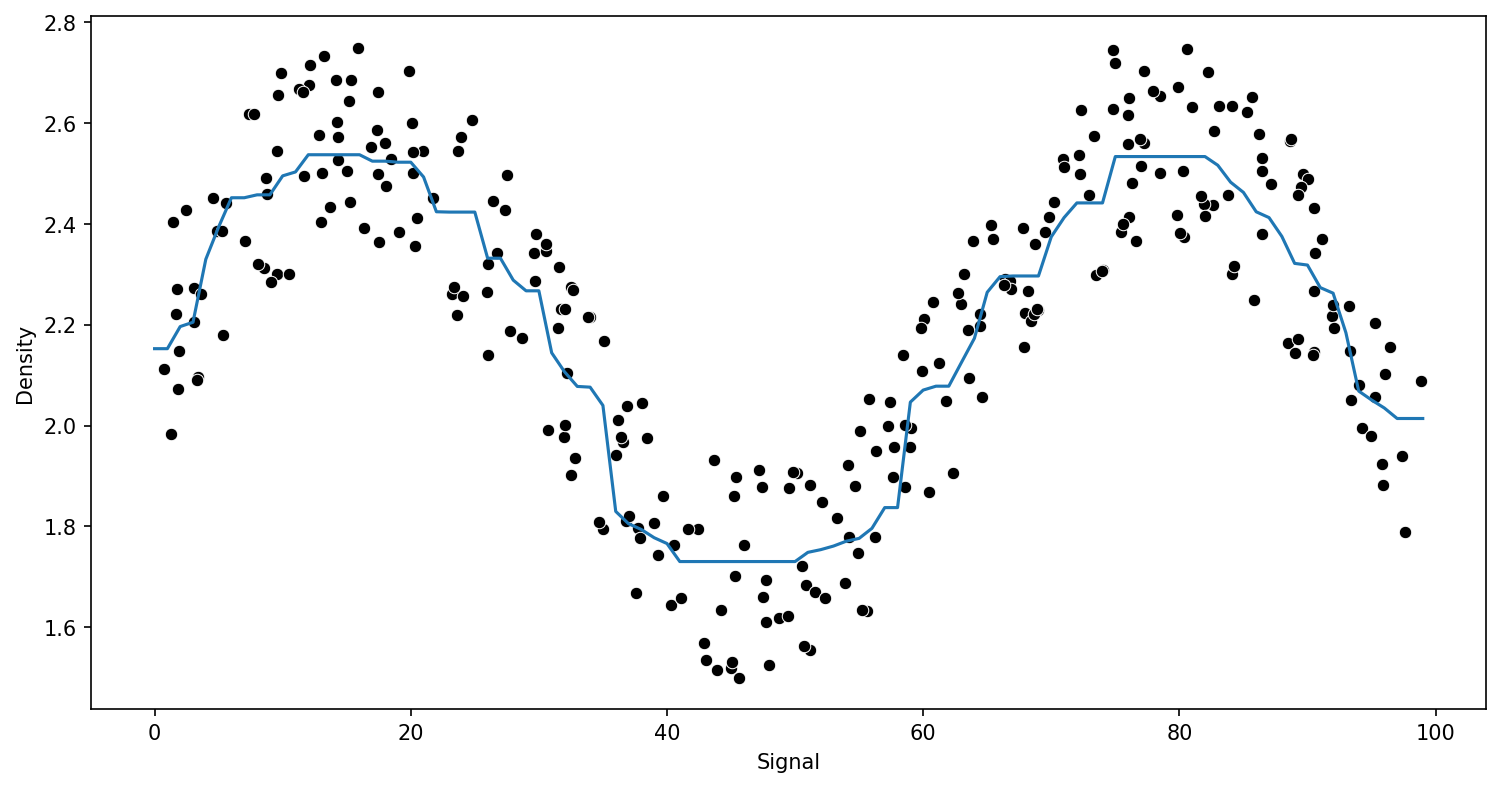

In [128]:
model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)